## Importing the Python Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

## Load the Dataset

In [71]:
data = pd.read_csv('Featured_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14246 non-null  float64
 1   Latitude          14246 non-null  float64
 2   Speed             14246 non-null  float64
 3   Distance          14246 non-null  float64
 4   Time              14246 non-null  object 
 5   Acc X             14246 non-null  float64
 6   Acc Y             14246 non-null  float64
 7   Acc Z             14246 non-null  float64
 8   Heading           14246 non-null  int64  
 9   gyro_x            14246 non-null  float64
 10  gyro_y            14246 non-null  float64
 11  gyro_z            14246 non-null  float64
 12  label             14246 non-null  int64  
 13  Acc_Magnitude     14246 non-null  float64
 14  Acc_Change        14246 non-null  float64
 15  Gyro_Magnitude    14246 non-null  float64
 16  Gyro_Change       14246 non-null  float6

In [72]:
data.describe()

,Longitude,Latitude,Speed,Distance,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,...,label,Acc_Magnitude,Acc_Change,Gyro_Magnitude,Gyro_Change,Net_Displacement,Speed_Change,Heading_Change,Rolling_Acc_Mean,Rolling_Acc_STD
count,14246.000000,14246.000000,14246.000000,1.424600e+04,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,...,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,1.424600e+04,14246.000000,14246.000000,14246.000000
mean,73.826564,18.508567,0.771898,2.795223e+03,-0.001137,0.180237,-0.023576,171.269128,-0.001319,-0.006521,...,0.592587,1.607835,0.000022,0.126696,-0.000001,0.000004,-9.351872e-20,-0.023937,1.608040,0.742972
std,0.003661,0.005242,0.705439,1.205988e+05,1.030982,0.837260,1.768811,105.496919,0.141039,0.087850,...,0.491370,1.529821,1.355076,0.127425,0.104109,0.000016,3.588373e-02,17.575867,1.227237,0.700332
min,73.821195,18.501504,0.000000,0.000000e+00,-8.805807,-8.476646,-17.320633,0.000000,-2.062668,-0.571912,...,0.000000,0.018581,-16.179881,0.001460,-1.387471,0.000000,-7.600000e-01,-359.000000,0.144979,0.015304
25%,73.822785,18.504085,0.000000,4.480815e+02,-0.378820,-0.126690,-0.701545,77.000000,-0.046690,-0.033272,...,0.000000,0.609765,-0.480551,0.040204,-0.031879,0.000000,0.000000e+00,0.000000,0.667844,0.269350
50%,73.828663,18.507860,0.760000,1.007369e+03,-0.013089,0.167227,-0.025761,150.000000,-0.002219,-0.005783,...,1.000000,1.118237,-0.013467,0.084782,-0.000116,0.000000,0.000000e+00,0.000000,1.284077,0.527778
75%,73.829445,18.513463,1.220000,1.645653e+03,0.362683,0.478868,0.674922,249.000000,0.044939,0.021706,...,1.000000,2.065718,0.473513,0.168847,0.030804,0.000000,0.000000e+00,0.000000,2.093364,0.951488
max,73.831393,18.518714,2.712000,8.312031e+06,10.488632,11.013258,19.725800,359.000000,1.611687,0.599585,...,1.000000,21.682698,16.313482,2.072244,1.626290,0.000231,9.280000e-01,359.000000,12.513593,7.277411


## Using IQR methods for finding outlier

Acc X:
Mean: -0.0011366664637793085, Standard Deviation: 1.0309816764314736
Number of outliers: 274
---
Acc Y:
Mean: 0.18023726479671487, Standard Deviation: 0.8372602501422597
Number of outliers: 280
---
Acc Z:
Mean: -0.02357612855987646, Standard Deviation: 1.7688114642038109
Number of outliers: 293
---
gyro_x:
Mean: -0.0013187204695353084, Standard Deviation: 0.14103872710719484
Number of outliers: 275
---
gyro_y:
Mean: -0.006521073514390004, Standard Deviation: 0.08784976524291623
Number of outliers: 357
---
gyro_z:
Mean: -0.003200064297627404, Standard Deviation: 0.06801676566446657
Number of outliers: 272
---


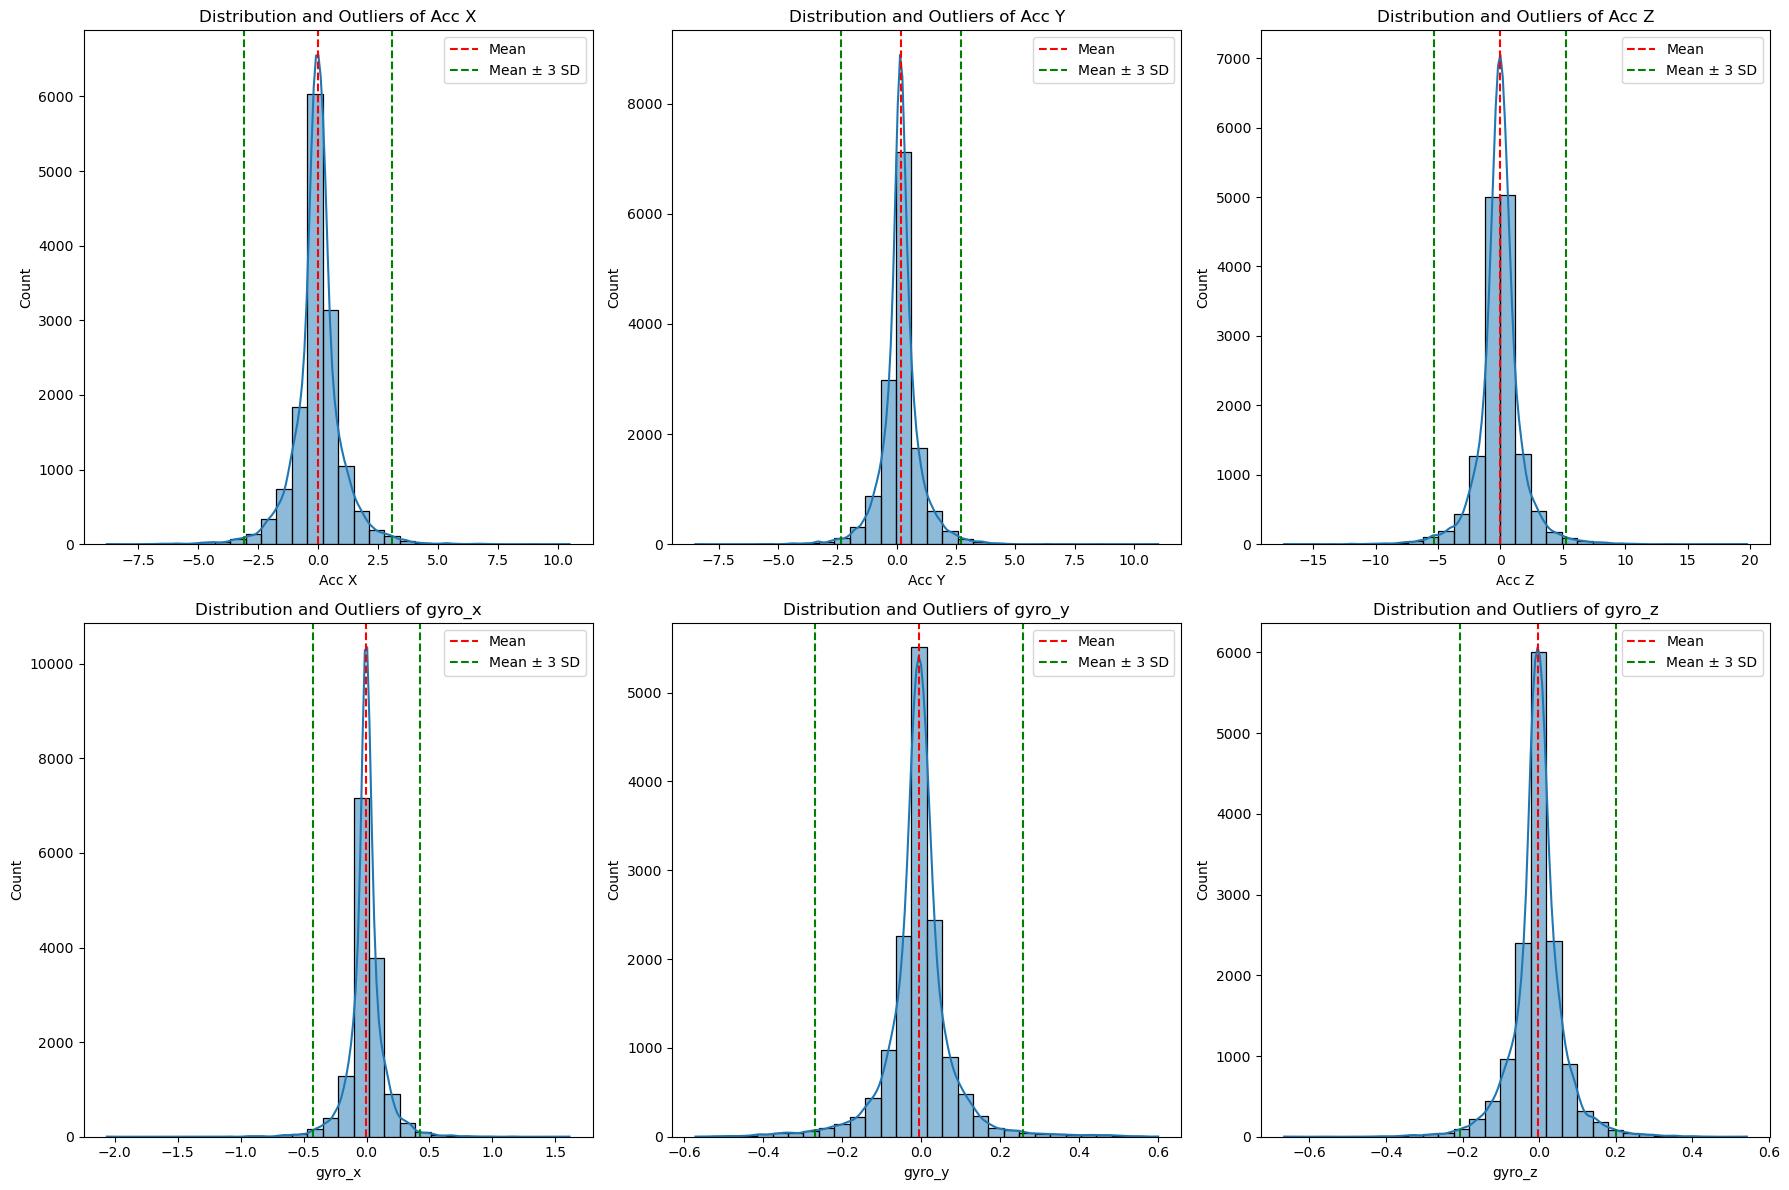

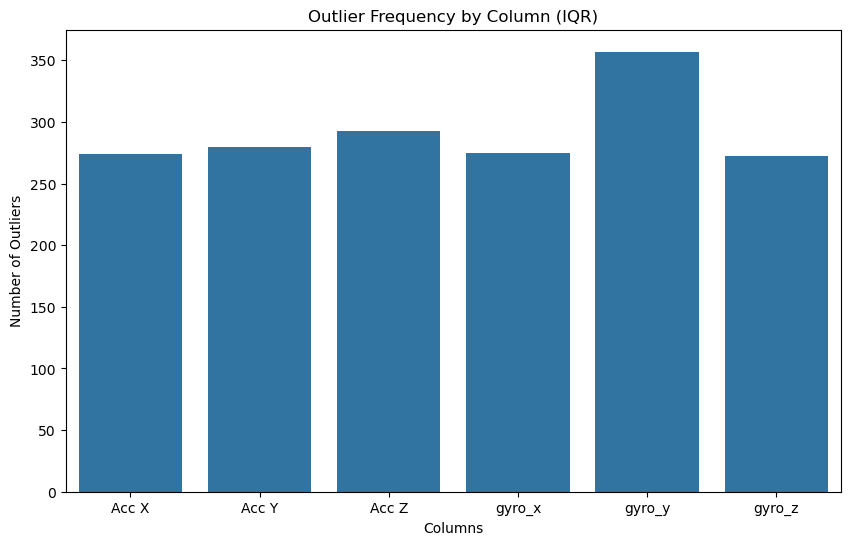

In [73]:
# Define a function to calculate Z-score and identify outliers
def calculate_zscore_outliers(data, column):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[(z_scores < -3) | (z_scores > 3)]
    return outliers, mean, std

# Apply the function to each numeric column
outliers_dict = defaultdict(list)
outlier_counts = {}

for col in ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']:
    outliers, mean, std = calculate_zscore_outliers(data, col)
    outliers_dict[col] = outliers
    outlier_counts[col] = len(outliers)
    print(f'{col}:')
    print(f'Mean: {mean}, Standard Deviation: {std}')
    print(f'Number of outliers: {len(outliers)}')
    print('---')

# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].axvline(data[col].mean(), color='r', linestyle='--', label='Mean')
        axes[i].axvline(data[col].mean() + 3 * data[col].std(), color='g', linestyle='--', label='Mean ± 3 SD')
        axes[i].axvline(data[col].mean() - 3 * data[col].std(), color='g', linestyle='--')
        axes[i].set_title(f'Distribution and Outliers of {col}')
        axes[i].legend()

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
plot_distribution_with_outliers(data, columns)

# Plotting the outlier frequency chart
def plot_outlier_frequency(outlier_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
    plt.title('Outlier Frequency by Column (IQR)')
    plt.xlabel('Columns')
    plt.ylabel('Number of Outliers')
    plt.show()

plot_outlier_frequency(outlier_counts)

## Using Z-Score for outliers detection

Acc X:
Mean: -0.0011366664637793085, Standard Deviation: 1.0309816764314736
Number of outliers: 274
---
Acc Y:
Mean: 0.18023726479671487, Standard Deviation: 0.8372602501422597
Number of outliers: 280
---
Acc Z:
Mean: -0.02357612855987646, Standard Deviation: 1.7688114642038109
Number of outliers: 293
---
gyro_x:
Mean: -0.0013187204695353084, Standard Deviation: 0.14103872710719484
Number of outliers: 275
---
gyro_y:
Mean: -0.006521073514390004, Standard Deviation: 0.08784976524291623
Number of outliers: 357
---
gyro_z:
Mean: -0.003200064297627404, Standard Deviation: 0.06801676566446657
Number of outliers: 272
---


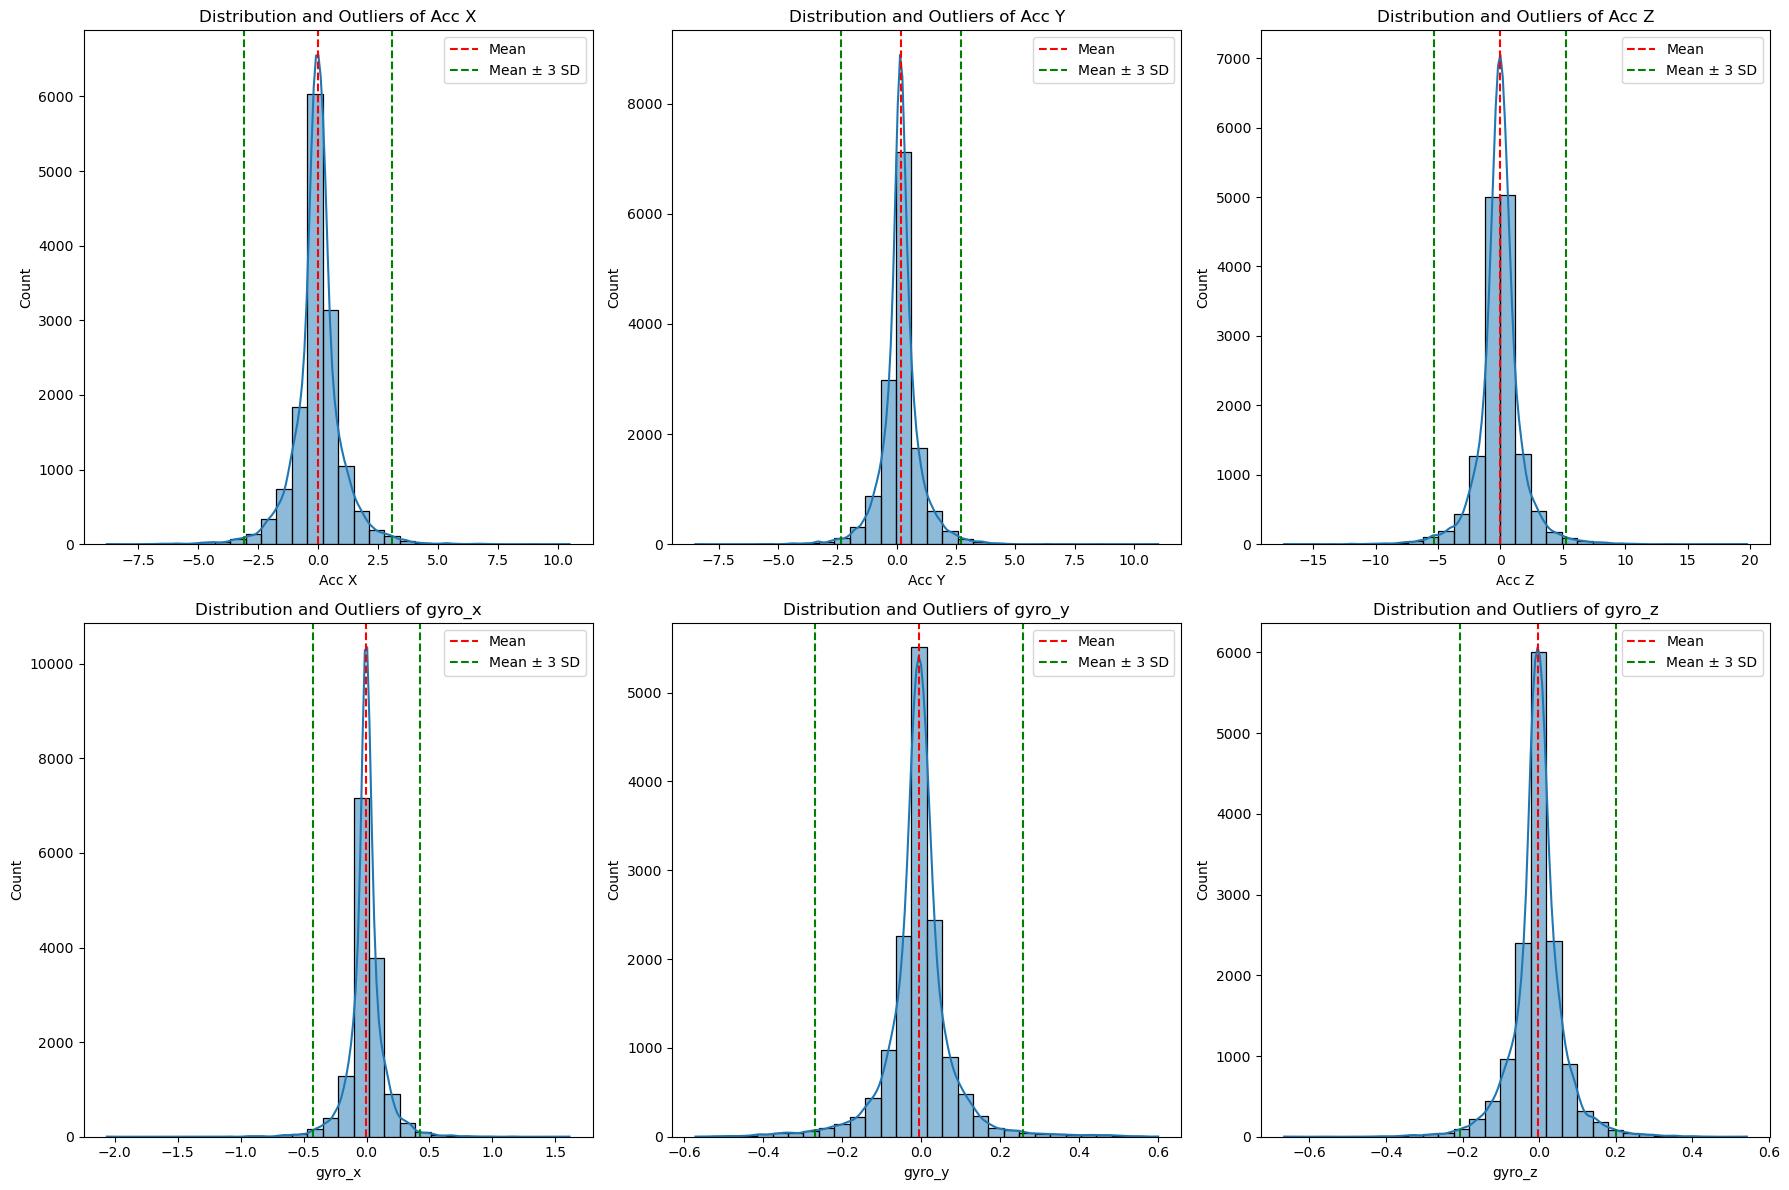

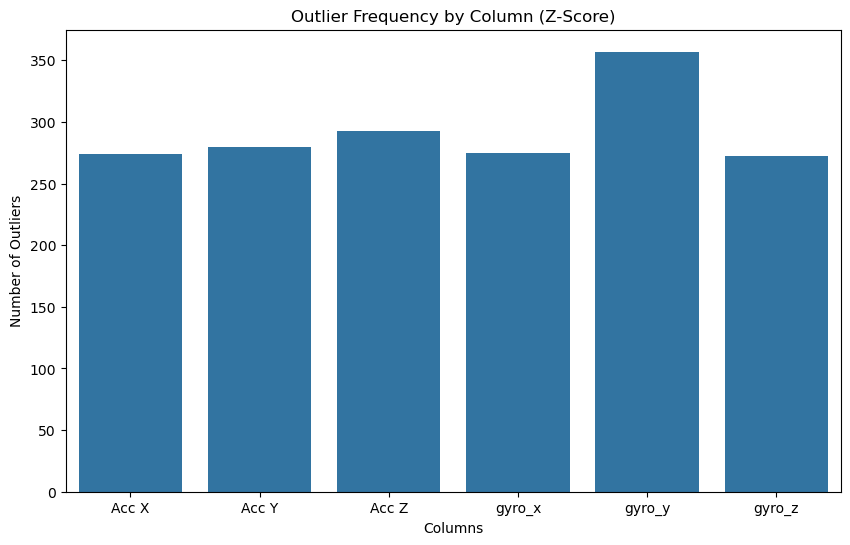

In [75]:
# Define a function to calculate Z-score and identify outliers
def calculate_zscore_outliers(data, column):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[(z_scores < -3) | (z_scores > 3)]
    return outliers, mean, std

# Apply the function to each numeric column
outliers_dict = defaultdict(list)
outlier_counts = {}

for col in ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']:
    outliers, mean, std = calculate_zscore_outliers(data, col)
    outliers_dict[col] = outliers
    outlier_counts[col] = len(outliers)
    print(f'{col}:')
    print(f'Mean: {mean}, Standard Deviation: {std}')
    print(f'Number of outliers: {len(outliers)}')
    print('---')

# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].axvline(data[col].mean(), color='r', linestyle='--', label='Mean')
        axes[i].axvline(data[col].mean() + 3 * data[col].std(), color='g', linestyle='--', label='Mean ± 3 SD')
        axes[i].axvline(data[col].mean() - 3 * data[col].std(), color='g', linestyle='--')
        axes[i].set_title(f'Distribution and Outliers of {col}')
        axes[i].legend()

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
plot_distribution_with_outliers(data, columns)

# Plotting the outlier frequency chart
def plot_outlier_frequency(outlier_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
    plt.title('Outlier Frequency by Column (Z-Score)')
    plt.xlabel('Columns')
    plt.ylabel('Number of Outliers')
    plt.show()

plot_outlier_frequency(outlier_counts)

## Using Isolation Forest for outliers detection

Accuracy: 0.7731
Precision: 0.8656
Recall: 0.7304
F1 Score: 0.7923


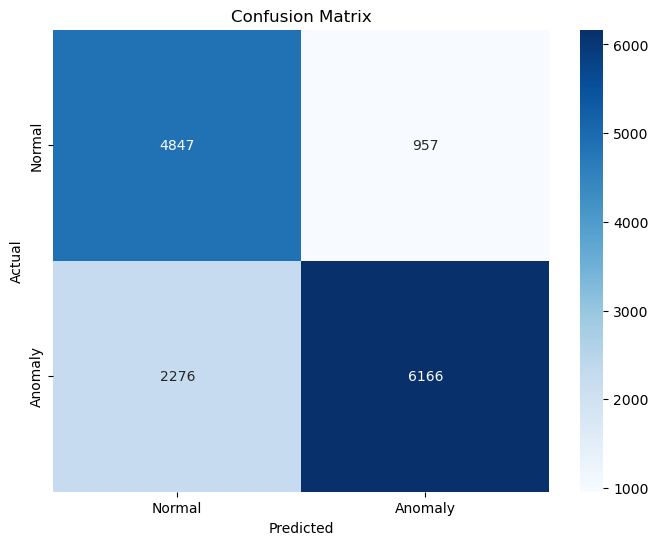

              precision    recall  f1-score   support

      Normal       0.68      0.84      0.75      5804
     Anomaly       0.87      0.73      0.79      8442

    accuracy                           0.77     14246
   macro avg       0.77      0.78      0.77     14246
weighted avg       0.79      0.77      0.78     14246



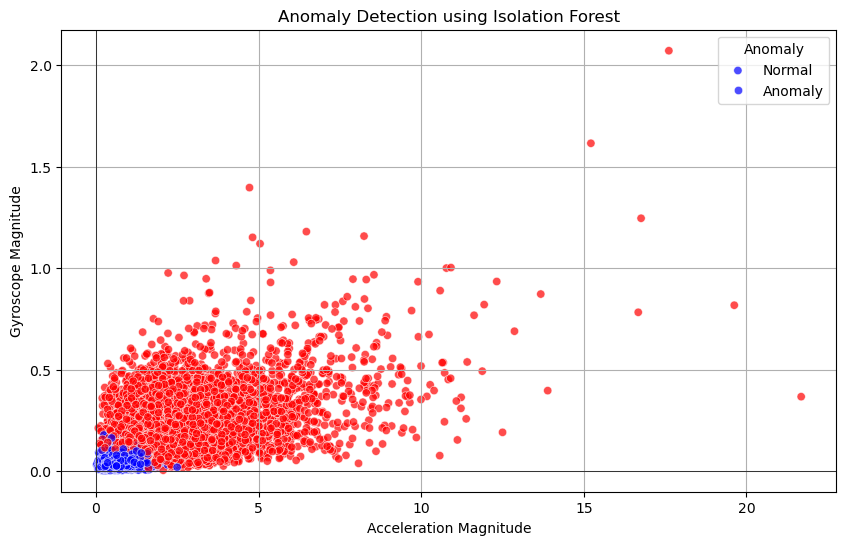

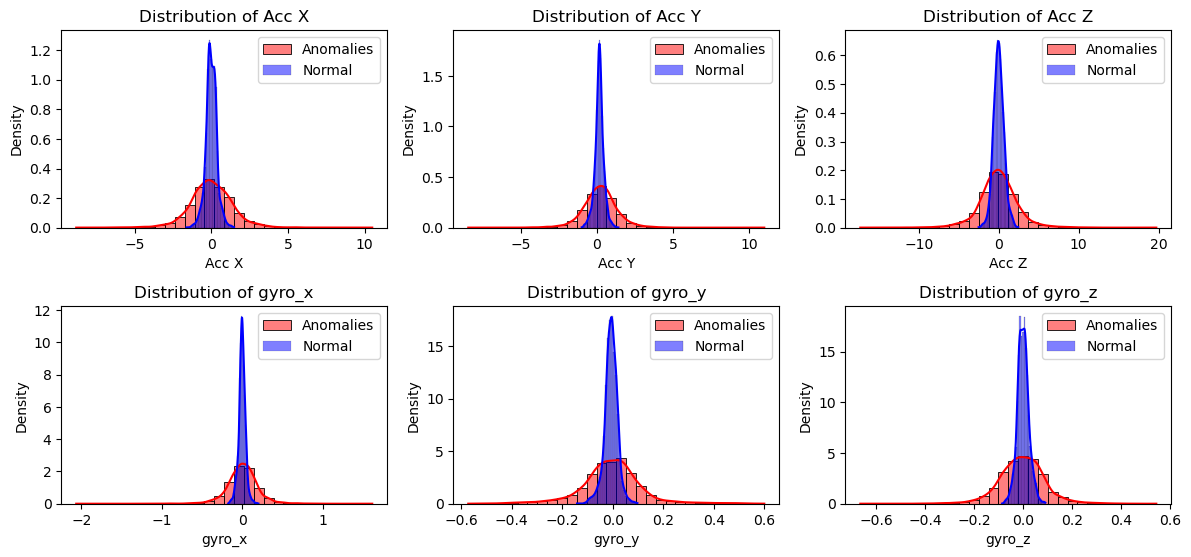

In [145]:

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']  # Modify as needed
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Isolation Forest model
iso_forest = IsolationForest(contamination=0.5, random_state=42)  # Adjust contamination as needed

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomalies
data['anomaly'] = iso_forest.predict(X_scaled)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation

 # Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(data['label'], data['anomaly'])
precision = precision_score(data['label'], data['anomaly'])
recall = recall_score(data['label'], data['anomaly'])
f1 = f1_score(data['label'], data['anomaly'])
        
# Print and store the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(data['label'], data['anomaly'])  # Replace 'label' with your actual label column name

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(data['label'], data['anomaly'], target_names=['Normal', 'Anomaly']))

# Visualizing anomalies on feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Acc_Magnitude', y='Gyro_Magnitude', hue='anomaly', 
                palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Acceleration Magnitude')
plt.ylabel('Gyroscope Magnitude')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.show()

# Visualize the distribution of anomalies
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)  # Adjust the layout as needed
    sns.histplot(data[data['anomaly'] == 1][feature], color='red', bins=30, kde=True, label='Anomalies', stat='density', alpha=0.5)
    sns.histplot(data[data['anomaly'] == 0][feature], color='blue', bins=30, kde=True, label='Normal', stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()


## Accuracy at different value of Contamination


Evaluating for contamination = 0.05
Accuracy: 0.4517
Precision: 0.9425
Recall: 0.0796
F1 Score: 0.1468

Evaluating for contamination = 0.1
Accuracy: 0.4931
Precision: 0.9284
Recall: 0.1567
F1 Score: 0.2682

Evaluating for contamination = 0.2
Accuracy: 0.5691
Precision: 0.9042
Recall: 0.3051
F1 Score: 0.4563

Evaluating for contamination = 0.3
Accuracy: 0.6438
Precision: 0.8940
Recall: 0.4526
F1 Score: 0.6010

Evaluating for contamination = 0.4
Accuracy: 0.7137
Precision: 0.8829
Recall: 0.5959
F1 Score: 0.7116

Evaluating for contamination = 0.5
Accuracy: 0.7731
Precision: 0.8656
Recall: 0.7304
F1 Score: 0.7923

Best contamination: 0.5 with Accuracy: 0.7731
Precision: 0.8656, Recall: 0.7304, F1 Score: 0.7923


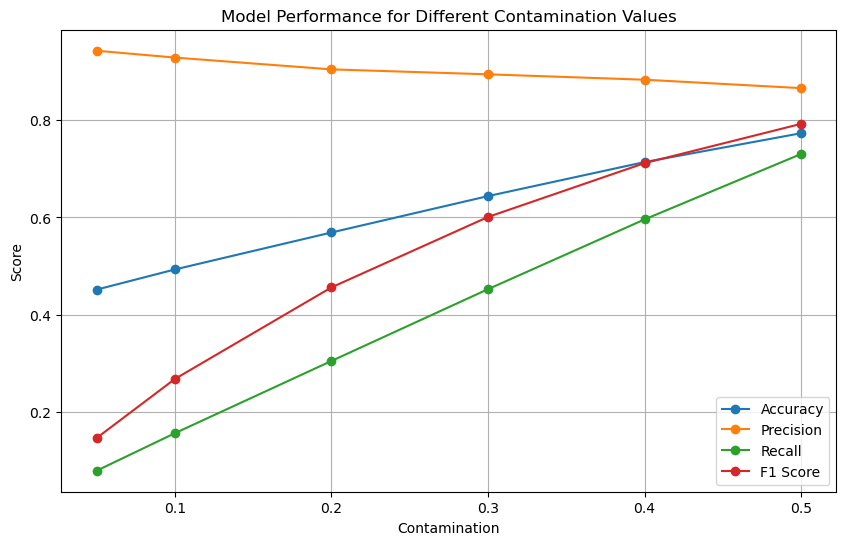

In [160]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Function to evaluate model performance for different contamination values
def evaluate_model_for_contamination(data, X_scaled, contamination_values):
    results = []
    
    for contamination in contamination_values:
        print(f"\nEvaluating for contamination = {contamination}")
        
        # Create the Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        
        # Fit the model
        iso_forest.fit(X_scaled)
        
        # Predict anomalies
        data['anomaly'] = iso_forest.predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'contamination': contamination,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of contamination values to try
contamination_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Call the function to evaluate the model for different contamination values
results = evaluate_model_for_contamination(data, X_scaled, contamination_values)

# Print the best contamination and its corresponding accuracy
best_contamination = max(results, key=lambda x: x['accuracy'])
print(f"\nBest contamination: {best_contamination['contamination']} with Accuracy: {best_contamination['accuracy']:.4f}")
print(f"Precision: {best_contamination['precision']:.4f}, Recall: {best_contamination['recall']:.4f}, F1 Score: {best_contamination['f1_score']:.4f}")

# Optionally, you can visualize the results
import matplotlib.pyplot as plt

# Plot the results
contaminations = [result['contamination'] for result in results]
accuracies = [result['accuracy'] for result in results]
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
f1_scores = [result['f1_score'] for result in results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score
plt.plot(contaminations, accuracies, label='Accuracy', marker='o')
plt.plot(contaminations, precisions, label='Precision', marker='o')
plt.plot(contaminations, recalls, label='Recall', marker='o')
plt.plot(contaminations, f1_scores, label='F1 Score', marker='o')

plt.title('Model Performance for Different Contamination Values')
plt.xlabel('Contamination')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of N-Neighbors (Local Outlier Factor)


Evaluating for n_neighbors = 5
Accuracy: 0.5814
Precision: 0.6740
Recall: 0.5687
F1 Score: 0.6169

Evaluating for n_neighbors = 10
Accuracy: 0.6153
Precision: 0.7078
Recall: 0.5973
F1 Score: 0.6479

Evaluating for n_neighbors = 20
Accuracy: 0.6429
Precision: 0.7355
Recall: 0.6206
F1 Score: 0.6732

Evaluating for n_neighbors = 30
Accuracy: 0.6558
Precision: 0.7484
Recall: 0.6315
F1 Score: 0.6850

Evaluating for n_neighbors = 40
Accuracy: 0.6671
Precision: 0.7597
Recall: 0.6410
F1 Score: 0.6953

Evaluating for n_neighbors = 50
Accuracy: 0.6748
Precision: 0.7674
Recall: 0.6475
F1 Score: 0.7023

Best n_neighbors: 50 with Accuracy: 0.6748
Precision: 0.7674, Recall: 0.6475, F1 Score: 0.7023


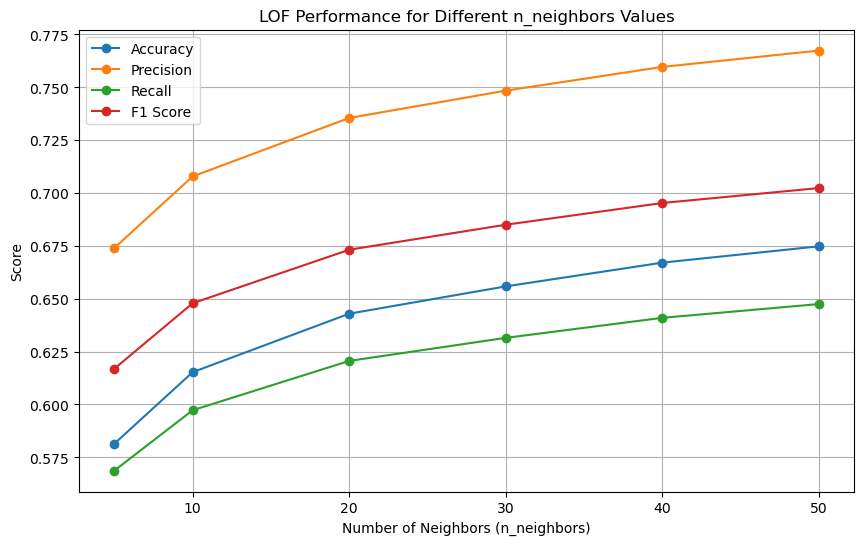

In [158]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate LOF model performance
def evaluate_lof_for_n_neighbors(data, X_scaled, n_neighbors_values):
    results = []
    
    for n_neighbors in n_neighbors_values:
        print(f"\nEvaluating for n_neighbors = {n_neighbors}")
        
        # Create the Local Outlier Factor model
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.5)  # Adjust contamination if needed
        
        # Predict anomalies (note: LOF uses -1 for outliers and 1 for inliers)
        data['anomaly'] = lof.fit_predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'n_neighbors': n_neighbors,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of n_neighbors values to try (this controls the number of neighbors for LOF)
n_neighbors_values = [5, 10, 20, 30, 40, 50]

# Call the function to evaluate the LOF model for different n_neighbors values
lof_results = evaluate_lof_for_n_neighbors(data, X_scaled, n_neighbors_values)

# Print the best n_neighbors and its corresponding accuracy
best_n_neighbors = max(lof_results, key=lambda x: x['accuracy'])
print(f"\nBest n_neighbors: {best_n_neighbors['n_neighbors']} with Accuracy: {best_n_neighbors['accuracy']:.4f}")
print(f"Precision: {best_n_neighbors['precision']:.4f}, Recall: {best_n_neighbors['recall']:.4f}, F1 Score: {best_n_neighbors['f1_score']:.4f}")

# Visualize the results
n_neighbors_list = [result['n_neighbors'] for result in lof_results]
accuracies = [result['accuracy'] for result in lof_results]
precisions = [result['precision'] for result in lof_results]
recalls = [result['recall'] for result in lof_results]
f1_scores = [result['f1_score'] for result in lof_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for LOF
plt.plot(n_neighbors_list, accuracies, label='Accuracy', marker='o')
plt.plot(n_neighbors_list, precisions, label='Precision', marker='o')
plt.plot(n_neighbors_list, recalls, label='Recall', marker='o')
plt.plot(n_neighbors_list, f1_scores, label='F1 Score', marker='o')

plt.title('LOF Performance for Different n_neighbors Values')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of nu (SVM)


Evaluating for nu = 0.01
Accuracy: 0.4257
Precision: 0.8939
Recall: 0.0349
F1 Score: 0.0673

Evaluating for nu = 0.05
Accuracy: 0.4511
Precision: 0.9332
Recall: 0.0795
F1 Score: 0.1465

Evaluating for nu = 0.1
Accuracy: 0.4928
Precision: 0.9276
Recall: 0.1564
F1 Score: 0.2676

Evaluating for nu = 0.2
Accuracy: 0.5703
Precision: 0.9073
Recall: 0.3062
F1 Score: 0.4579

Evaluating for nu = 0.3
Accuracy: 0.6434
Precision: 0.8933
Recall: 0.4523
F1 Score: 0.6005

Evaluating for nu = 0.4
Accuracy: 0.7124
Precision: 0.8812
Recall: 0.5949
F1 Score: 0.7103

Evaluating for nu = 0.5
Accuracy: 0.7747
Precision: 0.8673
Recall: 0.7318
F1 Score: 0.7938

Best nu: 0.5 with Accuracy: 0.7747
Precision: 0.8673, Recall: 0.7318, F1 Score: 0.7938


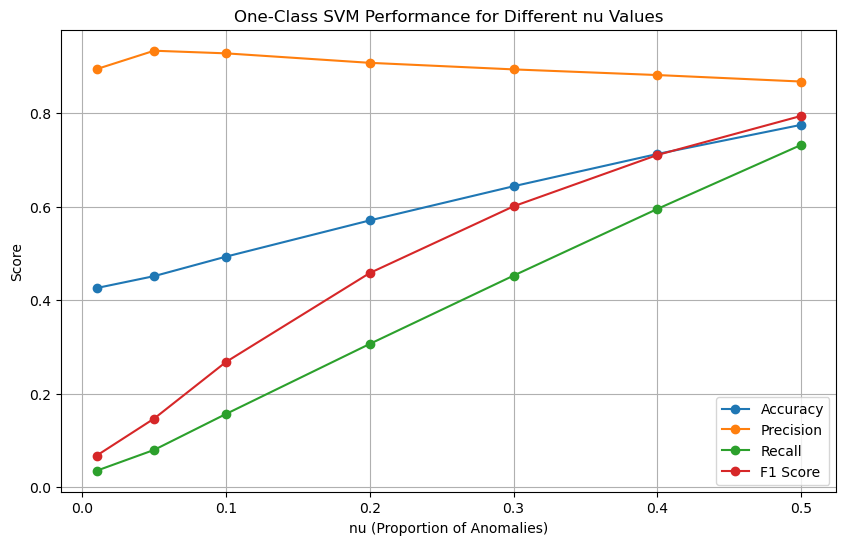

In [157]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate One-Class SVM model performance for different nu values
def evaluate_svm_for_nu_values(data, X_scaled, nu_values):
    results = []
    
    for nu in nu_values:
        print(f"\nEvaluating for nu = {nu}")
        
        # Create the One-Class SVM model
        oc_svm = OneClassSVM(nu=nu, kernel='rbf', gamma='scale')  # Adjust kernel and gamma if needed
        
        # Fit the model
        oc_svm.fit(X_scaled)
        
        # Predict anomalies (note: One-Class SVM uses -1 for outliers and 1 for inliers)
        data['anomaly'] = oc_svm.predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'nu': nu,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of nu values to try (nu controls the proportion of anomalies expected, like contamination)
nu_values = [0.01, 0.05, 0.1, 0.2, 0.3,0.4, 0.5]

# Call the function to evaluate the One-Class SVM for different nu values
svm_results = evaluate_svm_for_nu_values(data, X_scaled, nu_values)

# Print the best nu and its corresponding accuracy
best_nu = max(svm_results, key=lambda x: x['accuracy'])
print(f"\nBest nu: {best_nu['nu']} with Accuracy: {best_nu['accuracy']:.4f}")
print(f"Precision: {best_nu['precision']:.4f}, Recall: {best_nu['recall']:.4f}, F1 Score: {best_nu['f1_score']:.4f}")

# Visualize the results
nu_list = [result['nu'] for result in svm_results]
accuracies = [result['accuracy'] for result in svm_results]
precisions = [result['precision'] for result in svm_results]
recalls = [result['recall'] for result in svm_results]
f1_scores = [result['f1_score'] for result in svm_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for SVM
plt.plot(nu_list, accuracies, label='Accuracy', marker='o')
plt.plot(nu_list, precisions, label='Precision', marker='o')
plt.plot(nu_list, recalls, label='Recall', marker='o')
plt.plot(nu_list, f1_scores, label='F1 Score', marker='o')

plt.title('One-Class SVM Performance for Different nu Values')
plt.xlabel('nu (Proportion of Anomalies)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of K (KNN)


Evaluating for k = 5
Accuracy: 0.7757
Precision: 0.8683
Recall: 0.7326
F1 Score: 0.7947

Evaluating for k = 10
Accuracy: 0.7768
Precision: 0.8694
Recall: 0.7336
F1 Score: 0.7958

Evaluating for k = 15
Accuracy: 0.7771
Precision: 0.8697
Recall: 0.7338
F1 Score: 0.7960

Evaluating for k = 20
Accuracy: 0.7770
Precision: 0.8696
Recall: 0.7337
F1 Score: 0.7959

Evaluating for k = 25
Accuracy: 0.7764
Precision: 0.8690
Recall: 0.7332
F1 Score: 0.7954

Evaluating for k = 30
Accuracy: 0.7760
Precision: 0.8686
Recall: 0.7329
F1 Score: 0.7950

Best k: 15 with Accuracy: 0.7771
Precision: 0.8697, Recall: 0.7338, F1 Score: 0.7960


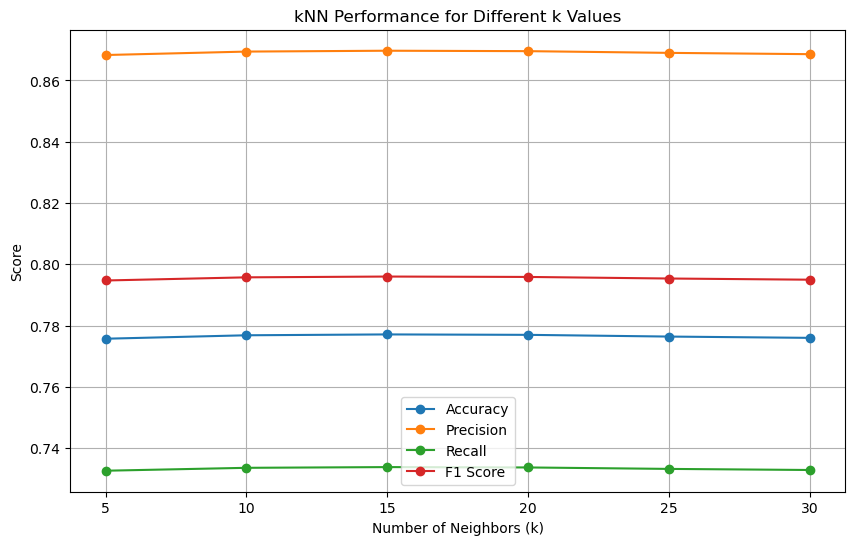

In [161]:
from pyod.models.knn import KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to evaluate kNN model performance for different k values
def evaluate_knn_for_k_values(data, X_scaled, k_values):
    results = []
    
    for k in k_values:
        print(f"\nEvaluating for k = {k}")
        
        # Create the kNN model (k=number of neighbors)
        knn = KNN(n_neighbors=k, contamination=0.5)  # Adjust contamination if needed
        
        # Fit the kNN model
        knn.fit(X_scaled)
        
        # Predict anomalies (0 = normal, 1 = anomaly)
        data['anomaly'] = knn.labels_  # Predicted labels
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'k': k,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of k values to try (number of neighbors)
k_values = [5, 10, 15, 20, 25, 30]

# Call the function to evaluate the kNN model for different k values
knn_results = evaluate_knn_for_k_values(data, X_scaled, k_values)

# Print the best k and its corresponding accuracy
best_k = max(knn_results, key=lambda x: x['accuracy'])
print(f"\nBest k: {best_k['k']} with Accuracy: {best_k['accuracy']:.4f}")
print(f"Precision: {best_k['precision']:.4f}, Recall: {best_k['recall']:.4f}, F1 Score: {best_k['f1_score']:.4f}")

# Visualize the results
k_list = [result['k'] for result in knn_results]
accuracies = [result['accuracy'] for result in knn_results]
precisions = [result['precision'] for result in knn_results]
recalls = [result['recall'] for result in knn_results]
f1_scores = [result['f1_score'] for result in knn_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for kNN
plt.plot(k_list, accuracies, label='Accuracy', marker='o')
plt.plot(k_list, precisions, label='Precision', marker='o')
plt.plot(k_list, recalls, label='Recall', marker='o')
plt.plot(k_list, f1_scores, label='F1 Score', marker='o')

plt.title('kNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of eps (DBSCAN)


Evaluating for eps = 0.1
Accuracy: 0.6110
Precision: 0.6039
Recall: 0.9987
F1 Score: 0.7526

Evaluating for eps = 0.2
Accuracy: 0.8162
Precision: 0.7753
Recall: 0.9715
F1 Score: 0.8624

Evaluating for eps = 0.3
Accuracy: 0.8387
Precision: 0.8263
Recall: 0.9216
F1 Score: 0.8713

Evaluating for eps = 0.4
Accuracy: 0.8086
Precision: 0.8528
Recall: 0.8183
F1 Score: 0.8352

Evaluating for eps = 0.5
Accuracy: 0.7572
Precision: 0.8740
Recall: 0.6896
F1 Score: 0.7710

Evaluating for eps = 0.6
Accuracy: 0.6997
Precision: 0.8881
Recall: 0.5643
F1 Score: 0.6901

Best eps: 0.3 with Accuracy: 0.8387
Precision: 0.8263, Recall: 0.9216, F1 Score: 0.8713


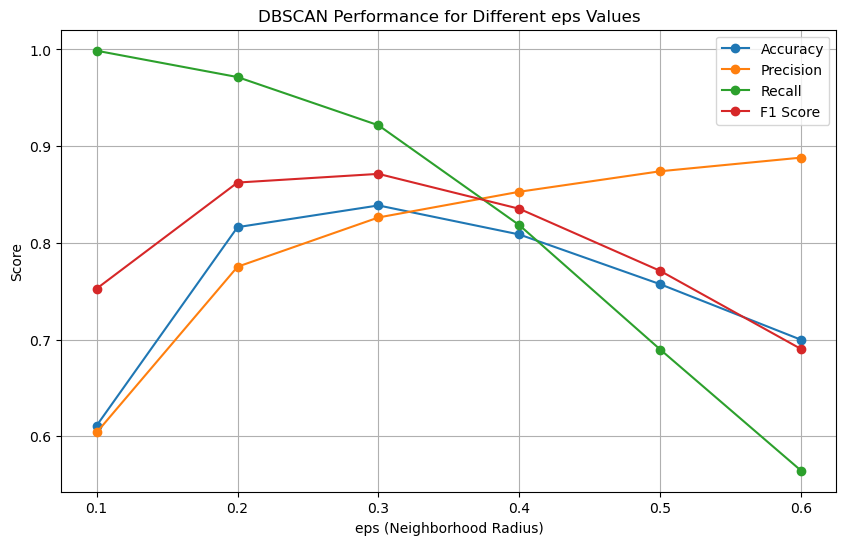

In [153]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate DBSCAN model performance for different eps values
def evaluate_dbscan_for_eps_values(data, X_scaled, eps_values, min_samples=5):
    results = []
    
    for eps in eps_values:
        print(f"\nEvaluating for eps = {eps}")
        
        # Create the DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Adjust min_samples as needed
        
        # Fit the DBSCAN model and predict anomalies
        data['anomaly'] = dbscan.fit_predict(X_scaled)
        
        # DBSCAN assigns -1 to noise points (outliers), and other numbers to clustered points.
        # Convert outliers (noise) to 1 (anomaly) and clusters to 0 (normal)
        data['anomaly'] = data['anomaly'].map(lambda x: 1 if x == -1 else 0)
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'eps': eps,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of eps values to try (eps defines the radius for forming clusters)
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Call the function to evaluate DBSCAN for different eps values
dbscan_results = evaluate_dbscan_for_eps_values(data, X_scaled, eps_values)

# Print the best eps and its corresponding accuracy
best_eps = max(dbscan_results, key=lambda x: x['accuracy'])
print(f"\nBest eps: {best_eps['eps']} with Accuracy: {best_eps['accuracy']:.4f}")
print(f"Precision: {best_eps['precision']:.4f}, Recall: {best_eps['recall']:.4f}, F1 Score: {best_eps['f1_score']:.4f}")

# Visualize the results
eps_list = [result['eps'] for result in dbscan_results]
accuracies = [result['accuracy'] for result in dbscan_results]
precisions = [result['precision'] for result in dbscan_results]
recalls = [result['recall'] for result in dbscan_results]
f1_scores = [result['f1_score'] for result in dbscan_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for DBSCAN
plt.plot(eps_list, accuracies, label='Accuracy', marker='o')
plt.plot(eps_list, precisions, label='Precision', marker='o')
plt.plot(eps_list, recalls, label='Recall', marker='o')
plt.plot(eps_list, f1_scores, label='F1 Score', marker='o')

plt.title('DBSCAN Performance for Different eps Values')
plt.xlabel('eps (Neighborhood Radius)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
